In [1]:
import Motoresdecombustioninterna as th

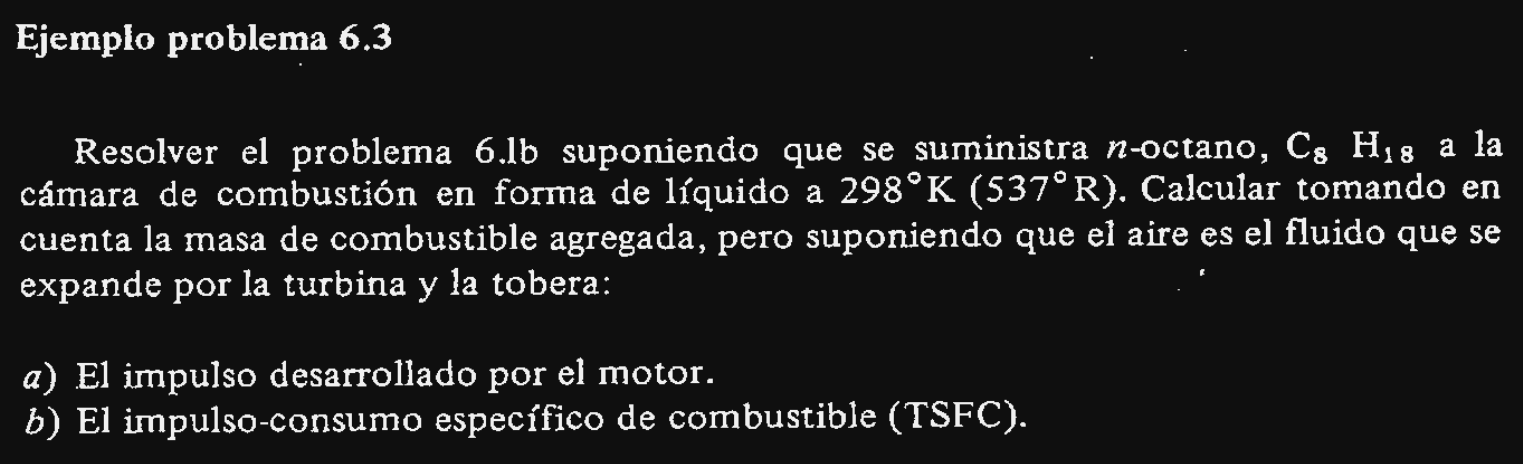

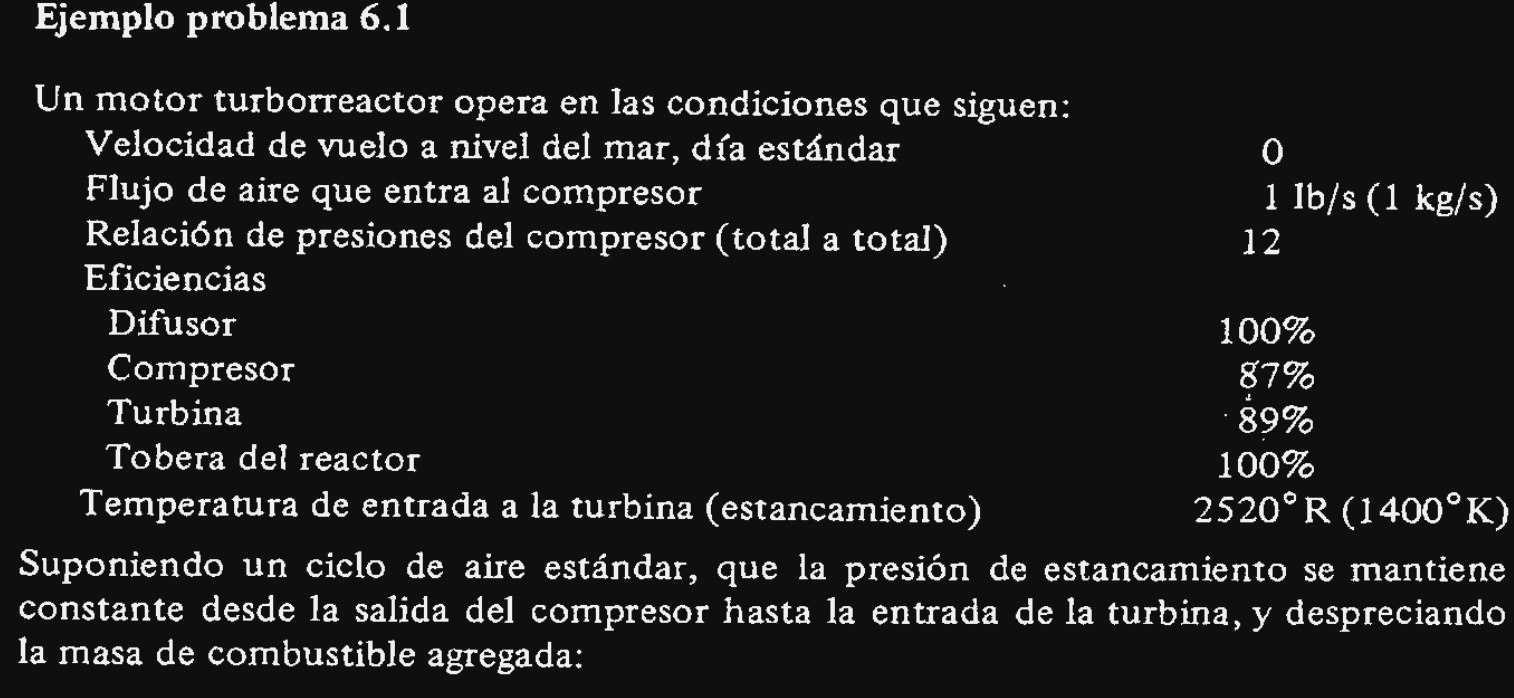

In [2]:
V1 = 0 #Velocidad de vuelo
MA = 1 #lb/s
RC = 12 # Relación de compresor
#Eficiencias
ND = 1 # Eficiencia de difusor
NC = 0.87 # Eficiencia de compresor
NTUR = 0.89 # Eficiencia de turbina
NTOB = 1 # Eficiencia tobera
T3 = 2520 # °R Temperatura de entrada a la turbina (estancamiento)
h = 0 # Altura a nivel del mar en ft
U = 1 # SISTEMA INGLES
R = 1.98718 # BTU/MOL*R
GC = 32.2 #lbm*ft/lbf*s^2
FactorCONV = 778.16 #BTU a lbf*ft
f = 0

In [3]:
x = 8 #OCTANO
tf = 537 # R
pesoMolecCombustible = th.pesoCombustible(x)

mf > 0

El aire se expande por turbina y tobera, no el combustible

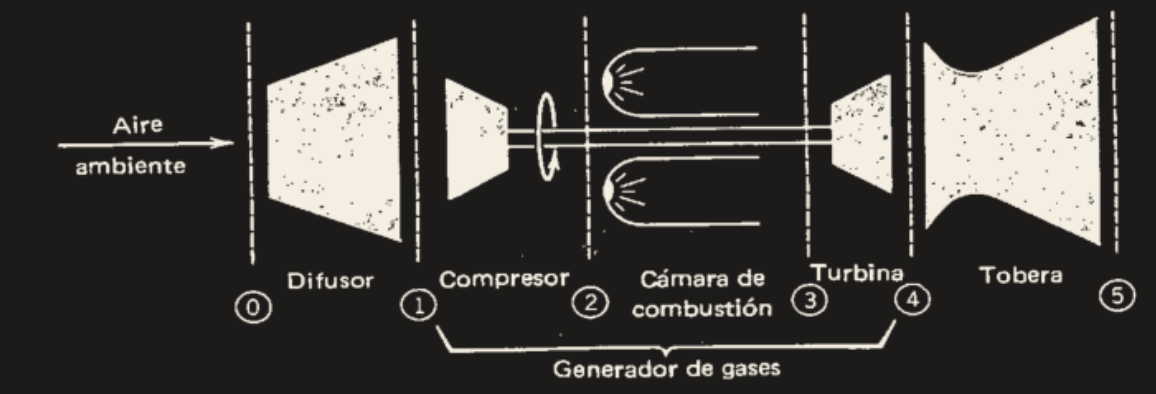

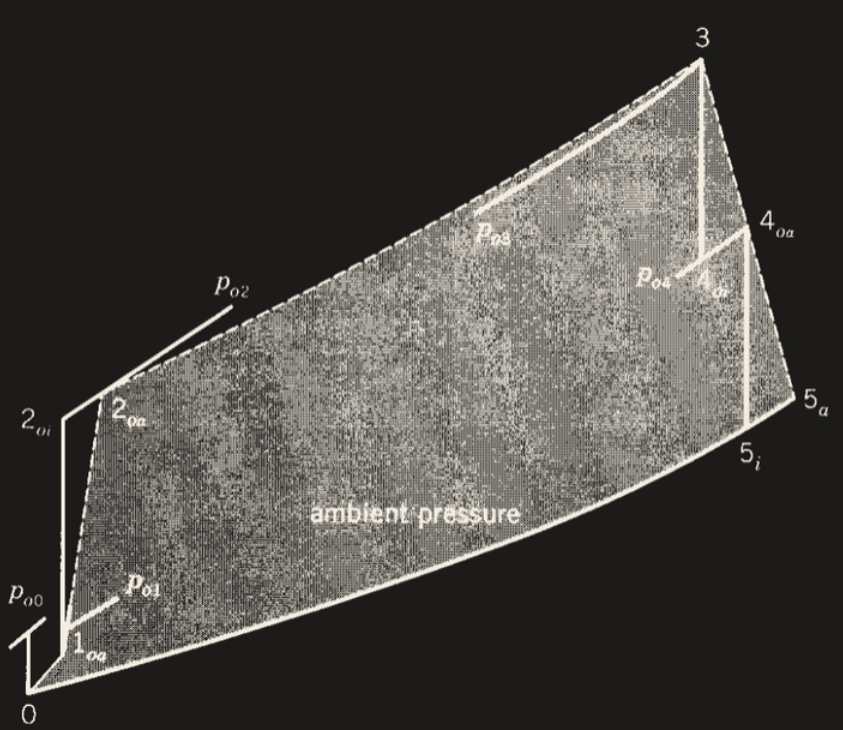

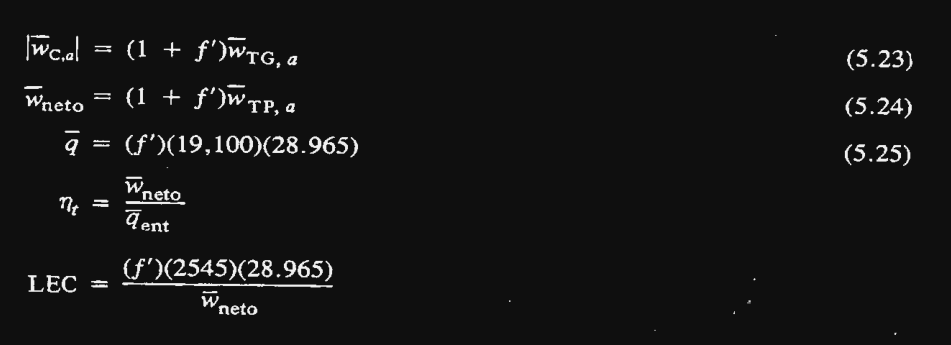

# Valores del punto 1 (Ent. Compresor)

In [4]:
tt1, pt1 = th.ISApropiedades(U,a=h)

In [5]:
tt1

In [6]:
pt1

In [7]:
th.reaccionGeneral(x)

La reacción general es
C8H18 + 12.5 O2 --> 8 CO2 + 9.0 H2O
La reacción con aire seco es
C8H18 + 59.6659 AS --> 8 CO2 + 9.0 H2O + 59.6659 AS-12.5 O2


Los moles para la reacción con aire seco

C8H18	1
 O2	-12.5
 CO2	8
 H2O	9.0
Aire	59.6659


In [8]:
# VALORES A MODIFICAR
molC8H18 = 1
molO2    = -12.5
molCO2   = 8
molH2O   = 9
molAireTeorico = 59.6659 #aire teorico, no real

In [9]:
ht1,pr1,st1 = th.valoresTablaAire(U,t=tt1)

-175.9568 h(Btu/mol) | 1.20686 Pr | 46.130045 s(Btu/mol*R)


# Sacar valores punto 2 ideal (Ent. Cámara de combustión)

Aquí entra el combustible y el exceso de aire seco

In [10]:
pt2=RC*pt1
pt2 #psi

In [11]:
pr2i = th.presionRelativa(pr1=pr1,rp=RC)
pr2i

In [12]:
ht2i,tt2i,st2i = th.valoresTablaAire(U,pr=pr2i)

3542.72890625 h(Btu/mol) | 1044.928125 Temperatura(R) | 51.06700406 s(Btu/mol*R)


# Sacar valores reales 2 (Ent. Cámara de combustión)

In [13]:
ht2r = th.eficienciaCompresor(eficCompresor=NC,h1=ht1,h2i=ht2i)
ht2r

In [14]:
tt2r,pr2r,st2r = th.valoresTablaAire(U,h=ht2r)

1121.26975225 Temperatura(R) | 18.74580393 Pr | 51.58025339 s(Btu/mol*R)


# Valores de cámara de combustión

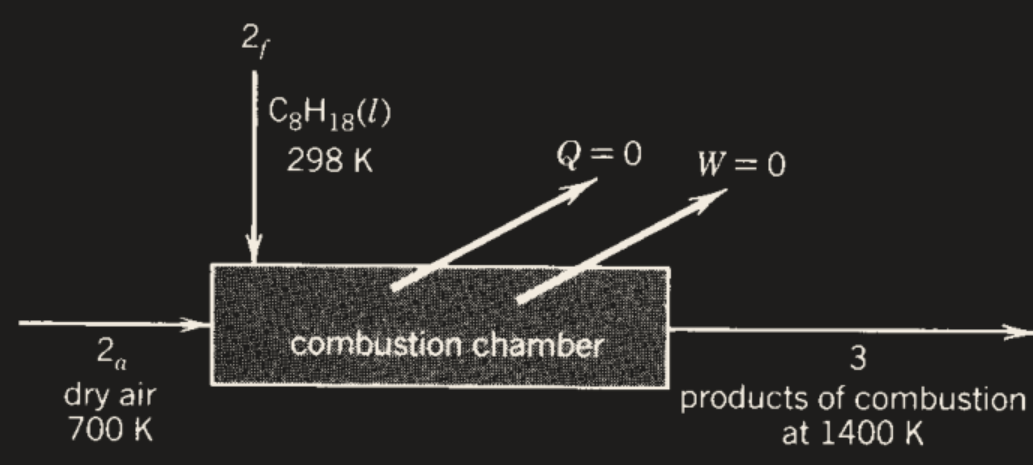

In [15]:
print("Temperatura 2a del aire:",tt2r, "\nTemperatura 3 de los productos:", T3)

Temperatura 2a del aire: 1121.26975225 
Temperatura 3 de los productos: 2520


In [16]:
molAireReal = (molCO2*th.moleculaEntalpia("co2",T3,U)
              +molH2O*th.moleculaEntalpia("h2o",T3,U)
              +molO2*th.moleculaEntalpia("o2",T3,U)
              -molC8H18*th.moleculaEntalpia("c8h18",T3,U)
              )/(th.moleculaEntalpia("aire seco",tt2r,U)-th.moleculaEntalpia("aire seco",T3,U))

molAireReal # lmolAire/lbmolCombustible

In [17]:
porcExcesoAire = th.excesoAire(suministradaReal=molAireReal, suministradaTeorica=molAireTeorico)
porcExcesoAire # Porcentaje

In [18]:
relCA = th.relCombustibleAireGases(C=x, CM = 1, AM = molAireReal)
relCA #[lbcombustible/lbaire]

In [19]:
hCombustion = (+molC8H18*th.moleculaEntalpia("C8H18",tf,U)
               -molCO2*th.moleculaEntalpia("CO2",tf,U)
               -molH2O*th.moleculaEntalpia("H2O",tf,U)
               ) #Reactivos-Productos
hCombustion # [BTU/lbmolCombustible]

In [20]:
qhLbAire = relCA*hCombustion/pesoMolecCombustible
# relCA -> [lbCombustible/lbAire] 
# hCombustion -> [BTU/lbmolCombustible]
# pesoMolecCombustible -> [lbCombustible/lbmolCombustible]
qhLbAire # BTU/lbAire

In [21]:
qhMolAire = qhLbAire*th.aireSecoMol
qhMolAire # BTU/lbmolAire

Moles totales para los productos

In [22]:
molProductos = molCO2+molH2O+molAireReal+molO2
molProductos # moles total

# Valores del punto 3 (Ent. Turbina de gas)

In [23]:
ht3,pr3,st3 = th.valoresTablaAire(U,t=T3)

15108.5 h(Btu/mol) | 450.9 Pr | 57.901 s(Btu/mol*R)


In [24]:
pt3=pt2
pt3

In [25]:
wCompresorR = ht2r-ht1
wCompresorR #BTU/lbmolAire, valores del aire

In [26]:
wTurbinaR = wCompresorR/(1+(relCA))
wTurbinaR #BTU/lbmolAire

In [27]:
wTurbinai = wTurbinaR/NTUR
wTurbinai #BTU/lbmolAire

In [28]:
ht4r = ht3-wTurbinaR
ht4r #BTU/lbmolaire

In [29]:
ht4i = th.eficienciaTurbinaGas(eficTurbinaGas=NTUR,h3=ht3,h4r=ht4r)
ht4i #BTU/lbmolaire

In [30]:
tt4i,pr4i,st4i = th.valoresTablaAire(U,h=ht4i)

1943.24830929 Temperatura(R) | 155.39570052 Pr | 55.78331807 s(Btu/mol*R)


In [31]:
pt4 = pt3*(pr4i/pr3)
pt4 #psi

In [32]:
tt4r,pr4r,st4r = th.valoresTablaAire(U,h=ht4r)

2007.81438446 Temperatura(R) | 177.28754964 Pr | 56.04525754 s(Btu/mol*R)


# Tobera convergente-divergente

In [33]:
p5=pt1
p5

In [34]:
pr5i = pr4r*(p5/pt4)
pr5i #PSI

In [35]:
h5i,t5i,s5i=th.valoresTablaAire(U,pr=pr5i)

6162.4032786 h(Btu/mol) | 1398.70413738 Temperatura(R) | 53.22400234 s(Btu/mol*R)


In [36]:
v5i = ((ht4r-h5i)*(2*GC*778.16)/th.aireSecoMol)**(1/2)
v5i #ft/s

In [37]:
impulsoConvDiv = MA*((1+relCA)*v5i/GC)
impulsoConvDiv #lbf

# TSFC

In [38]:
TSFC = relCA*3600/impulsoConvDiv
TSFC # lbm/lbf-h